**Table of contents**<a id='toc0_'></a>    
- [Importing Data](#toc1_)    
- [Data Wranging and Consistency Checks](#toc2_)    
  - [Verifying NaN values](#toc2_1_)    
  - [Deriving New Variables](#toc2_2_)    
- [Visualizations](#toc3_)    
  - [Revenue Contribution of Top 25 Products with Department Names](#toc3_1_)    
  - [Department Sales Volume by Price Range](#toc3_2_)    
  - [Product Price Range Distribution](#toc3_3_)    
  - [Return Frequency per Type of Loyalty Customers](#toc3_4_)    
  - [Total Department Orders per Customer Loyalty Status](#toc3_5_)    
  - [Ordering Habits per Customer Return Frequency](#toc3_6_)    
  - [Customer Profile Distribution by Region](#toc3_7_)    
  - [Spending Percentage per Customer Profile](#toc3_8_)    
  - [Customer Distribution among Profiles](#toc3_9_)    
  - [Department Sales Volume per Region](#toc3_10_)    
  - [Customer Loyalty Distribution by Region](#toc3_11_)    
  - [Customers Order Days by Profile](#toc3_12_)    
  - [Orders by Age per Family Status](#toc3_13_)    
- [Exporting Visualizations as PNG files](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing Data](#toc0_)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
Path = r'D:\Data Analysis\01-08-2025 Instacart Basket Analysis'
df_merged = pd.read_pickle(os.path.join(Path, 'Data', 'Prepared Data', 'ord_pro_cust.pkl'))
df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,orders_frequency,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,3108588,1,8,1,14,14.0,10258,3,1,Pistachios,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3108588,1,8,1,14,14.0,25133,4,1,Organic String Cheese,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,3108588,1,8,1,14,14.0,46149,5,0,Zero Calorie Cola,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [3]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629741 entries, 0 to 30629740
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   user_id                 object  
 2   order_number            int8    
 3   order_day_of_week       int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float32 
 6   product_id              int32   
 7   add_to_cart_order       int16   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int16   
 11  department_id           int8    
 12  prices                  float32 
 13  price_range             category
 14  busiest_days            category
 15  busiest_period_of_day   category
 16  max_order               int8    
 17  loyalty_flag            category
 18  mean_price              float32 
 19  spender_type            category
 20  orders_frequency        category
 21  First 

Customers Data Security Measures: The personal identifying information included in this dataset caused for most results to be aggregated and will require limiting access to only authorized decision making executives.

In [4]:
depart = pd.read_csv(os.path.join(Path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=0)
depart

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [5]:
depart.reset_index(inplace=True)
depart.rename(columns={'index':'department_id'}, inplace=True)
depart

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# <a id='toc2_'></a>[Data Wranging and Consistency Checks](#toc0_)

## <a id='toc2_1_'></a>[Verifying NaN values](#toc0_)

In [6]:
#Verifying if Order Number is 0 for days_since_prior_order NaNs values
crosstabs = pd.crosstab(df_merged['days_since_prior_order'], df_merged['order_number'], dropna=False)
crosstabs.to_clipboard

<bound method NDFrame.to_clipboard of order_number                 1       2       3       4       5       6   \
days_since_prior_order                                                    
0.0                           0   19338   19356   17067   15571   15199   
1.0                           0   29915   28199   26700   25739   24179   
2.0                           0   44120   43837   41450   38519   38613   
3.0                           0   58387   59818   56798   54885   53235   
4.0                           0   72703   74506   69498   66668   62973   
5.0                           0   83919   86570   81811   76837   73416   
6.0                           0  114088  116437  108651  100729   95430   
7.0                           0  174711  171846  157862  148934  135945   
8.0                           0  105991  104222   96909   90198   82668   
9.0                           0   69790   71226   64511   61663   55715   
10.0                          0   58587   59157   54158   4904

In [7]:
dspoNaNChecks = df_merged[df_merged['days_since_prior_order'].isna()]
dspoNaNChecks

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,orders_frequency,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
11,1374495,3,1,1,14,NaN,9387,1,0,Granny Smith Apples,...,Frequent Customer,Janice,Fry,Female,Arizona,33,7/28/2017,3,married,93240
12,1374495,3,1,1,14,NaN,17668,2,0,Unsweetened Chocolate Almond Breeze Almond Milk,...,Frequent Customer,Janice,Fry,Female,Arizona,33,7/28/2017,3,married,93240
13,1374495,3,1,1,14,NaN,15143,3,0,Blueberry Pint,...,Frequent Customer,Janice,Fry,Female,Arizona,33,7/28/2017,3,married,93240
14,1374495,3,1,1,14,NaN,16797,4,0,Strawberries,...,Frequent Customer,Janice,Fry,Female,Arizona,33,7/28/2017,3,married,93240
15,1374495,3,1,1,14,NaN,39190,5,0,Vanilla Unsweetened Almond Milk,...,Frequent Customer,Janice,Fry,Female,Arizona,33,7/28/2017,3,married,93240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629473,28210,206201,1,6,14,NaN,46607,17,0,StackerMallows Marshmallows,...,Regular Customer,Doris,Mckee,Female,Delaware,78,3/18/2019,3,married,92450
30629525,3189322,206206,1,3,18,NaN,13817,1,0,"\""Im Pei-nut Butter\"" Double Chocolate Cookie ...",...,Frequent Customer,Theresa,Scott,Female,Idaho,25,2/11/2018,2,married,75041
30629526,3189322,206206,1,3,18,NaN,24099,2,0,Snickerdoodle Cookie with Salted Caramel Ice C...,...,Frequent Customer,Theresa,Scott,Female,Idaho,25,2/11/2018,2,married,75041
30629527,3189322,206206,1,3,18,NaN,47011,3,0,Organic Ginger Limeade Fruit Juice Drink,...,Frequent Customer,Theresa,Scott,Female,Idaho,25,2/11/2018,2,married,75041


In [8]:
dspoNaNChecks[dspoNaNChecks['order_number']>1]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,orders_frequency,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income


In [9]:
df_merged.isna().describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,orders_frequency,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
count,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741,...,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741
unique,1,1,1,1,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,30629741,30629741,30629741,30629741,30629741,28667038,30629741,30629741,30629741,30629741,...,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741,30629741


In [ ]:
# Listing columns that have NaN values
df_merged.columns[df_merged.isna().any()].tolist()

['days_since_prior_order', 'prices']

## <a id='toc2_2_'></a>[Deriving New Variables](#toc0_)

In [11]:
df_merged.loc[df_merged['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'North East'
df_merged.loc[df_merged['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'
df_merged.loc[df_merged['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Mid West'
df_merged.loc[df_merged['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'
df_merged['Region'].value_counts(dropna=False)

Region
South         10198982
West           7831810
Mid West       7176924
North East     5422025
Name: count, dtype: int64

In [12]:
df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region
0,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,3108588,1,8,1,14,14.0,10258,3,1,Pistachios,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3108588,1,8,1,14,14.0,25133,4,1,Organic String Cheese,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,3108588,1,8,1,14,14.0,46149,5,0,Zero Calorie Cola,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [13]:
df_merged['Region'].isna().sum()

np.int64(0)

In [14]:
#Creating a subset that acts as a flag to exclude low activity customers
lowActivity = df_merged[df_merged['user_id'].isin(df_merged.groupby('user_id')['order_number'].max()[df_merged.groupby('user_id')['order_number'].max() <5].index)]
lowActivity

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region
37,1909121,5,2,0,16,11.0,43693,1,1,Whole Vitamin D Milk,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West
38,1909121,5,2,0,16,11.0,6808,2,0,Organic Spinach & Cheese Tortellini,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West
39,1909121,5,2,0,16,11.0,24535,3,1,Plain Whole Milk Yogurt,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West
40,1909121,5,2,0,16,11.0,11777,4,1,Red Raspberries,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West
41,1909121,5,2,0,16,11.0,21616,5,0,Organic Baby Arugula,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629198,2100630,206186,3,5,16,30.0,36315,6,1,Low Fat Split Pea Soup,...,Beverly,Sanford,Female,Texas,32,6/30/2017,0,single,77973,South
30629199,2100630,206186,3,5,16,30.0,39619,7,0,Organic Tomato Basil Pasta Sauce,...,Beverly,Sanford,Female,Texas,32,6/30/2017,0,single,77973,South
30629200,2100630,206186,3,5,16,30.0,18610,8,0,Cola Soda,...,Beverly,Sanford,Female,Texas,32,6/30/2017,0,single,77973,South
30629201,2100630,206186,3,5,16,30.0,18418,9,0,Ginger Ale Soda,...,Beverly,Sanford,Female,Texas,32,6/30/2017,0,single,77973,South


In [15]:
df_cleared = df_merged[df_merged['user_id'].isin(df_merged.groupby('user_id')['order_number'].max()[df_merged.groupby('user_id')['order_number'].max() >=5].index)]
df_cleared.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region
0,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,3108588,1,8,1,14,14.0,10258,3,1,Pistachios,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3108588,1,8,1,14,14.0,25133,4,1,Organic String Cheese,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,3108588,1,8,1,14,14.0,46149,5,0,Zero Calorie Cola,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [16]:
df_cleared.shape

(29270938, 31)

In [17]:
df_cleared.groupby('n_dependants')['Age'].nunique()

n_dependants
0    64
1    64
2    64
3    64
Name: Age, dtype: int64

In [18]:
df_cleared['Age'].max()

np.int8(81)

In [19]:
df_cleared.groupby('n_dependants')['income'].max()

n_dependants
0    584097
1    579397
2    593901
3    591089
Name: income, dtype: int32

In [20]:
df_cleared.loc[(df_cleared['Age']<30) & (df_cleared['n_dependants']>0), ['Region', 'income']].sort_values('income')

,Region,income
27194143,West,25972
27194146,West,25972
27194145,West,25972
27194144,West,25972
27194153,West,25972
...,...,...
11880954,South,396364
11880955,South,396364
11880948,South,396364
11880964,South,396364


In [21]:
df_cleared.loc[(df_cleared['Age']<30) & (df_cleared['n_dependants']==0), ['Region', 'income']].sort_values('income')

,Region,income
15755228,South,25979
8934497,South,25979
8934498,South,25979
8934499,South,25979
15755224,South,25979
...,...,...
14969131,West,385324
14969126,West,385324
14969130,West,385324
14969129,West,385324


In [22]:
df_cleared.loc[(df_cleared['Age']<30) & (df_cleared['n_dependants']==0) & (df_cleared['income']<=396364), ['Age', 'income']].sort_values('income')

,Age,income
15755228,27,25979
8934497,27,25979
8934498,27,25979
8934499,27,25979
15755224,27,25979
...,...,...
14969131,25,385324
14969126,25,385324
14969130,25,385324
14969129,25,385324


In [23]:
df_cleared.loc[(df_cleared['Age']<30) & (df_cleared['income']>385324) & (df_cleared['income']<=396364) & (df_cleared['n_dependants']==0), ['Age', 'income']].sort_values('income')

,Age,income


In [24]:
#Creating profiling variable based on age, income, certain goods in the “department_id”, n_dependents, orders_day_of_week and order_hour_of_day columns
df_cleared.loc[(df_cleared['Age']<30) & (df_cleared['n_dependants']==0) & (df_cleared['income']<=396364), 'Profile'] = 'Young Adult, no Kids'
df_cleared.loc[(df_cleared['Age']<30) & (df_cleared['n_dependants']>0) & (df_cleared['income']<=396364), 'Profile'] = 'Parent, Low Income'
df_cleared.loc[(df_cleared['Age']>=30) & (df_cleared['Age']<65) & (df_cleared['income']<=396364), 'Profile'] = 'Parent, Mid Income'
df_cleared.loc[(df_cleared['Age']>=30) & (df_cleared['Age']<65) & (df_cleared['income']>396364), 'Profile'] = 'Parent, High Income'
df_cleared.loc[(df_cleared['Age']>=65) & (df_cleared['income']<=396364), 'Profile'] = 'Retired'
df_cleared.loc[(df_cleared['Age']>=65) & (df_cleared['income']>396364), 'Profile'] = 'Retired, High Income'
df_cleared.head()

C:\Users\Giova\AppData\Local\Temp\ipykernel_2524\1687364164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared.loc[(df_cleared['Age']<30) & (df_cleared['n_dependants']==0) & (df_cleared['income']<=396364), 'Profile'] = 'Young Adult, no Kids'


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,Profile
0,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,"Parent, Mid Income"
1,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,"Parent, Mid Income"
2,3108588,1,8,1,14,14.0,10258,3,1,Pistachios,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,"Parent, Mid Income"
3,3108588,1,8,1,14,14.0,25133,4,1,Organic String Cheese,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,"Parent, Mid Income"
4,3108588,1,8,1,14,14.0,46149,5,0,Zero Calorie Cola,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,"Parent, Mid Income"


In [25]:
df_cleared['Profile'].value_counts(dropna=False)

Profile
Parent, Mid Income      16010117
Retired                  7721327
Parent, Low Income       4137654
Young Adult, no Kids     1355774
Parent, High Income        28045
Retired, High Income       18021
Name: count, dtype: int64

# <a id='toc3_'></a>[Visualizations](#toc0_)

## <a id='toc3_1_'></a>[Revenue Contribution of Top 25 Products with Department Names](#toc0_)

In [26]:
top25Products = df_merged.groupby(['department_id', 'product_name', 'price_range'], observed=True)['prices'].sum().reset_index().nlargest(25, 'prices')
topDepart = top25Products.merge(depart, on='department_id', indicator='merged')
topDepart = topDepart.rename(columns={'product_name':'Product Name', 'prices':'Total Sales (in Millions)'})
topDepart

,department_id,Product Name,price_range,Total Sales (in Millions),department,merged
0,4,Banana,Mid Range,5.496587e+06,produce,both
1,4,Bag of Organic Bananas,Mid Range,3.684732e+06,produce,both
2,4,Large Lemon,Mid Range,2.020102e+06,produce,both
3,4,Limes,Mid Range,1.956790e+06,produce,both
4,4,Organic Baby Spinach,Mid Range,1.874233e+06,produce,both
5,4,Organic Strawberries,Mid Range,1.830774e+06,produce,both
6,16,Organic Whole Milk,Mid Range,1.670938e+06,dairy eggs,both
7,4,Cucumber Kirby,Mid Range,1.214189e+06,produce,both
8,4,Apple Honeycrisp Organic,Mid Range,1.132907e+06,produce,both
9,4,Organic Cucumber,Mid Range,1.091490e+06,produce,both


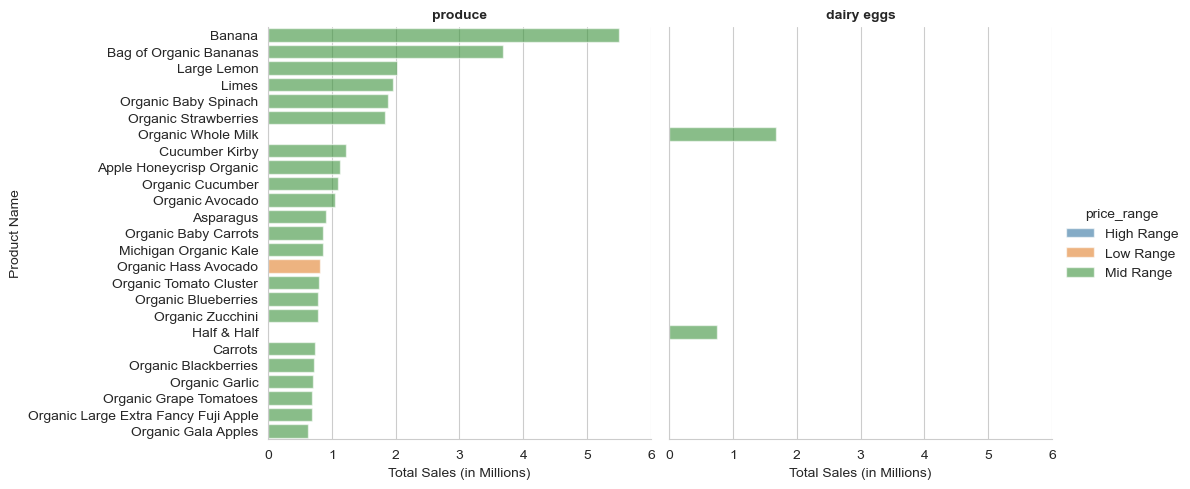

In [27]:
sns.set_style('whitegrid')
topProducts = sns.catplot(data=topDepart, y='Product Name', x='Total Sales (in Millions)', col='department', hue='price_range', kind='bar', alpha=0.6, aspect=1.1)
topProducts.set_xticklabels(rotation=0)
topProducts.set_titles("{col_name}", fontsize=20, fontweight='bold')

## <a id='toc3_2_'></a>[Department Sales Volume by Price Range](#toc0_)

In [28]:
departOrders = df_merged.groupby(['department_id', 'price_range'], observed=True)['order_id'].count().sort_values(ascending=False)
departOrd = pd.DataFrame(departOrders).reset_index()
departOrd = departOrd.rename(columns={'order_id':'Total Orders (in Milliions)'})
OrderbyDept = departOrd.merge(depart, on='department_id', indicator='merges')
OrderbyDept

,department_id,price_range,Total Orders (in Milliions),department,merges
0,4,Mid Range,6412447,produce,both
1,16,Mid Range,3744801,dairy eggs,both
2,4,Low Range,2551049,produce,both
3,7,Mid Range,1734438,beverages,both
4,19,Low Range,1719941,snacks,both
5,1,Mid Range,1468890,frozen,both
6,16,Low Range,1351603,dairy eggs,both
7,13,Mid Range,1268212,pantry,both
8,19,Mid Range,1010541,snacks,both
9,3,Mid Range,836461,bakery,both


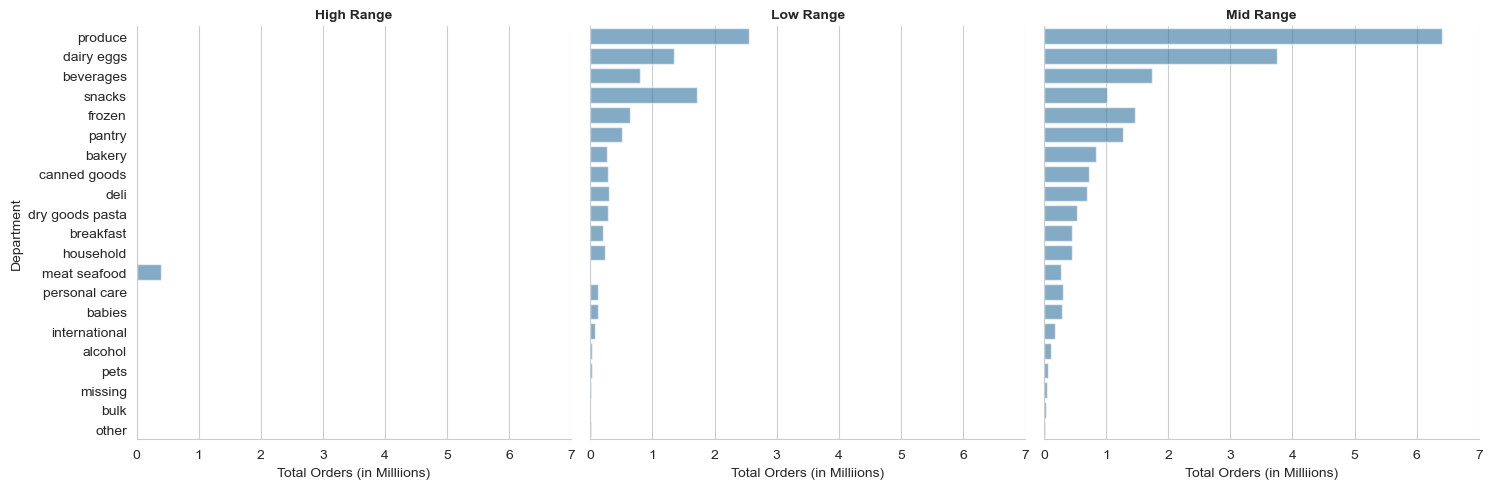

In [29]:
sns.set_style('whitegrid')
departRange = sns.catplot(data=OrderbyDept, y='department', x='Total Orders (in Milliions)', col='price_range', kind='bar', alpha=0.6, aspect=1)
departRange.set_xticklabels(rotation=0)
departRange.set_titles("{col_name}", fontsize=20, fontweight='bold')
departRange.set_ylabels('Department')

## <a id='toc3_3_'></a>[Product Price Range Distribution](#toc0_)

Text(0.5, 0, 'Price')

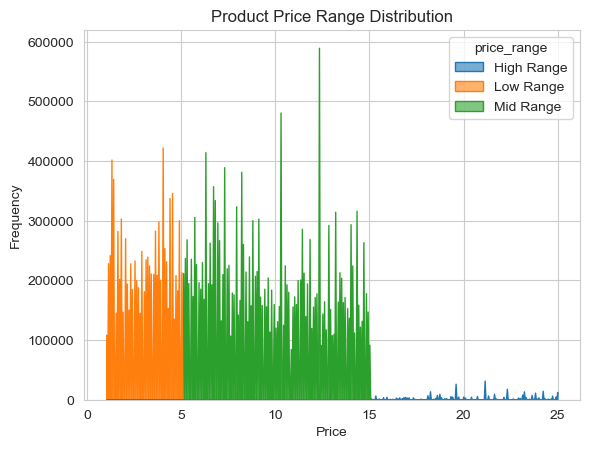

In [30]:
PriceRangeHist = sns.histplot(data=df_merged, alpha=0.6, x='prices', hue='price_range', element='poly')
plt.title('Product Price Range Distribution')
plt.ylabel('Frequency')
plt.xlabel('Price')

## <a id='toc3_4_'></a>[Return Frequency per Type of Loyalty Customers](#toc0_)

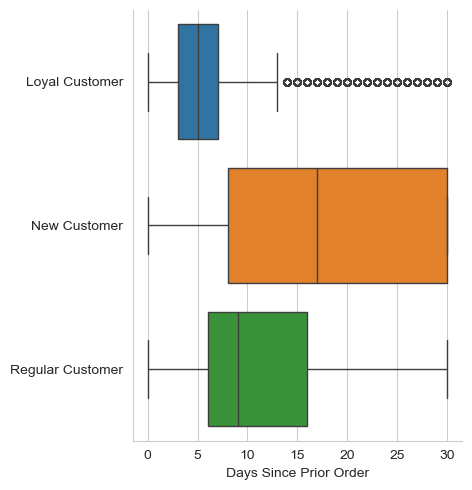

In [31]:
sns.set_style('whitegrid')
RetFrequencyBox = sns.catplot(data=df_merged, y='loyalty_flag', x='days_since_prior_order', hue='loyalty_flag', kind='box')
RetFrequencyBox.set_ylabels('')
RetFrequencyBox.set_xlabels('Days Since Prior Order')

## <a id='toc3_5_'></a>[Total Department Orders per Customer Loyalty Status](#toc0_)

In [32]:
loyalByDept = df_merged.groupby(['department_id', 'loyalty_flag'], observed=True).agg({'order_id':'count', 'reordered':'sum'}).reset_index().nlargest(40, 'order_id')
loyalDepart = loyalByDept.merge(depart, on='department_id', indicator='merged')
loyalDepart = loyalDepart.rename(columns={'order_id':'orders', 'reordered':'reorders', 'department':'Department'})
loyalDepart

,department_id,loyalty_flag,orders,reorders,Department,merged
0,4,Regular Customer,4345736,2814382,produce,both
1,4,Loyal Customer,2976740,2362046,produce,both
2,16,Regular Customer,2455073,1632404,dairy eggs,both
3,16,Loyal Customer,1726929,1404753,dairy eggs,both
4,4,New Customer,1641020,649358,produce,both
5,19,Regular Customer,1334968,761533,snacks,both
6,7,Regular Customer,1248191,819644,beverages,both
7,1,Regular Customer,1079877,597089,frozen,both
8,16,New Customer,919183,377561,dairy eggs,both
9,19,Loyal Customer,890309,634030,snacks,both


In [33]:
loyalChartData = pd.melt(loyalDepart, id_vars=['Department', 'loyalty_flag'], value_vars=['orders', 'reorders'], var_name='Type', value_name='Total (in millions)')
loyalChartData

,Department,loyalty_flag,Type,Total (in millions)
0,produce,Regular Customer,orders,4345736
1,produce,Loyal Customer,orders,2976740
2,dairy eggs,Regular Customer,orders,2455073
3,dairy eggs,Loyal Customer,orders,1726929
4,produce,New Customer,orders,1641020
...,...,...,...,...
75,babies,Regular Customer,reorders,104006
76,household,Loyal Customer,reorders,105548
77,dry goods pasta,New Customer,reorders,45004
78,household,New Customer,reorders,30557


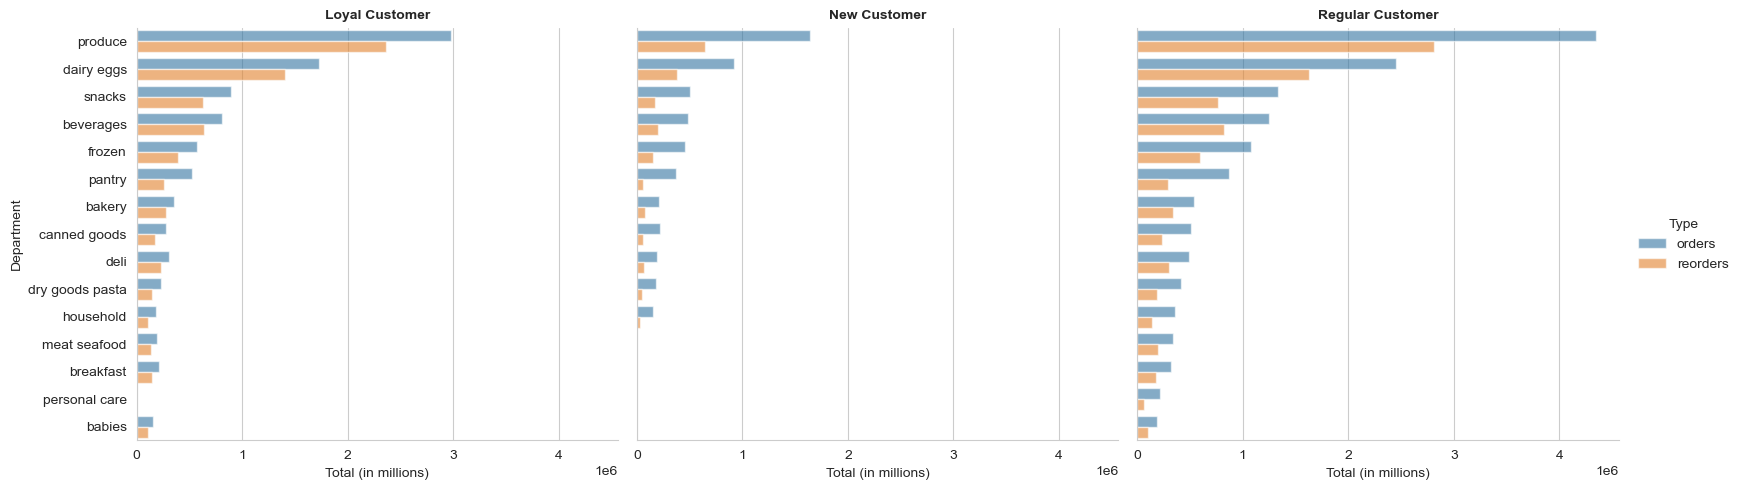

In [34]:
sns.set_style('whitegrid')
loyalByDept = sns.catplot(data=loyalChartData, y='Department', x='Total (in millions)', col='loyalty_flag', kind='bar', hue='Type', alpha=0.6, aspect=1.1)
loyalByDept.set_titles("{col_name}", fontsize=20, fontweight='bold')

## <a id='toc3_6_'></a>[Ordering Habits per Customer Return Frequency](#toc0_)

In [35]:
lp = df_merged.groupby(['loyalty_flag', 'orders_frequency'], observed=True)['prices'].sum().sort_values(ascending=False)
loyalPrice = pd.DataFrame(lp).reset_index()
loyalPrice = loyalPrice.rename(columns={'prices':'Total Sales', 'orders_frequency':'Frequency'})
loyalPrice

,loyalty_flag,Frequency,Total Sales
0,Loyal Customer,Frequent Customer,7.544310e+07
1,Regular Customer,Frequent Customer,7.102986e+07
2,Regular Customer,Regular Customer,3.937580e+07
3,New Customer,Non-frequent customer,2.008118e+07
4,New Customer,Regular Customer,1.378255e+07
5,New Customer,Frequent Customer,1.217562e+07
6,Regular Customer,Non-frequent customer,6.713734e+06
7,Loyal Customer,Regular Customer,2.527470e+04


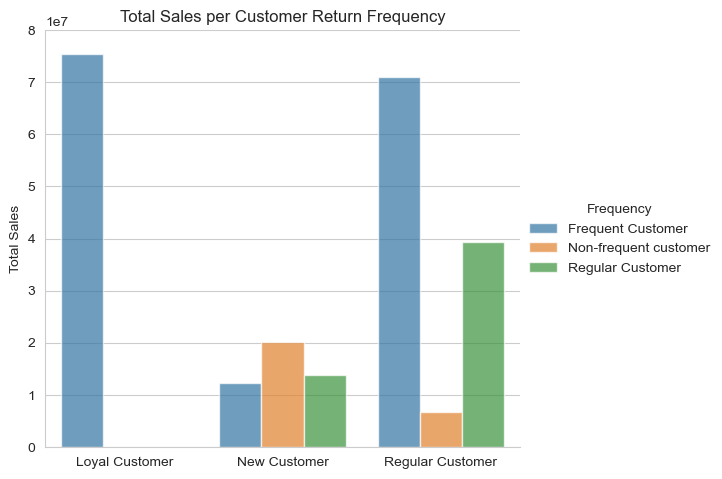

In [36]:
sns.set_style('whitegrid')
loyalByPrice = sns.catplot(data=loyalPrice, y='Total Sales', x='loyalty_flag', kind='bar', hue='Frequency', alpha=0.7, aspect=1.1)
loyalByPrice.set_xticklabels(rotation=0)
plt.title('Total Sales per Customer Return Frequency')
loyalByPrice.set_xlabels('')
loyalByPrice.set(ylim=(0,80000000))

## <a id='toc3_7_'></a>[Customer Profile Distribution by Region](#toc0_)

In [37]:
profileRegion = pd.crosstab(df_cleared['Profile'], df_cleared['Region'], normalize=True)*100
profileRegion

Region,Mid West,North East,South,West
Profile,,,,
"Parent, High Income",0.036367,0.013751,0.021280,0.024413
"Parent, Low Income",3.305155,2.465015,4.740299,3.625237
"Parent, Mid Income",12.905596,9.530098,18.229115,14.031481
Retired,6.105503,4.820139,8.714507,6.738667
"Retired, High Income",0.020269,0.010550,0.020525,0.010222
"Young Adult, no Kids",1.062829,0.850499,1.573274,1.145208


<function matplotlib.pyplot.show(close=None, block=None)>

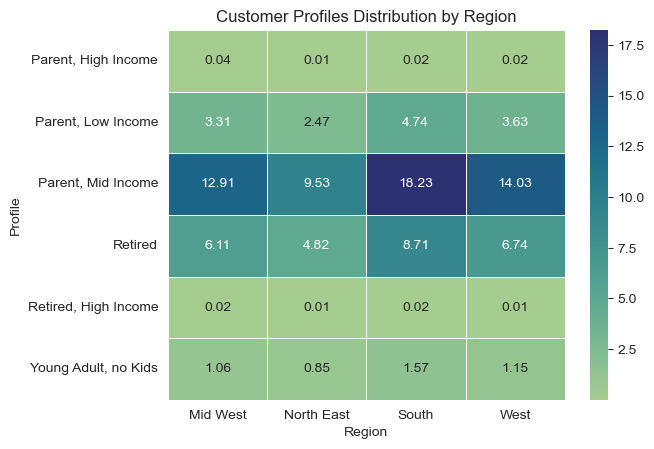

In [38]:
RegionProf = sns.heatmap(profileRegion, annot=True, fmt='.2f', linewidths=0.5, cmap='crest')
plt.title('Customer Profiles Distribution by Region')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show

## <a id='toc3_8_'></a>[Spending Percentage per Customer Profile](#toc0_)

In [39]:
#profile by userID percentage and spendertype
ps = pd.crosstab(index=df_cleared['Profile'], columns=df_cleared['spender_type'], normalize='index')*100
ps

spender_type,High Spender,Low Spender
Profile,,
"Parent, High Income",100.000000,0.000000
"Parent, Low Income",1.937233,98.062767
"Parent, Mid Income",1.809144,98.190856
Retired,1.660725,98.339275
"Retired, High Income",100.000000,0.000000
"Young Adult, no Kids",1.635376,98.364624


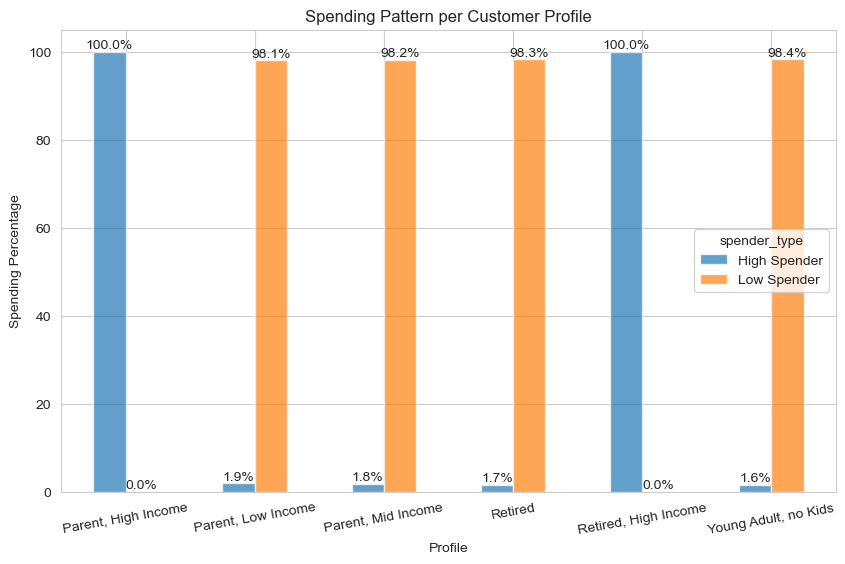

In [40]:
sns.set_style('whitegrid')
profileSpender = ps.plot.bar(rot=10, alpha=0.7, figsize=(10,6))
plt.ylabel('Spending Percentage')
plt.title('Spending Pattern per Customer Profile')
for container in profileSpender.containers:
  profileSpender.bar_label(container, fmt='%.1f%%', label_type='edge')

## <a id='toc3_9_'></a>[Customer Distribution among Profiles](#toc0_)

In [41]:
PDi = df_cleared['Profile'].value_counts(normalize=True)*100
PDi

Profile
Parent, Mid Income      54.696290
Retired                 26.378816
Parent, Low Income      14.135707
Young Adult, no Kids     4.631809
Parent, High Income      0.095812
Retired, High Income     0.061566
Name: proportion, dtype: float64

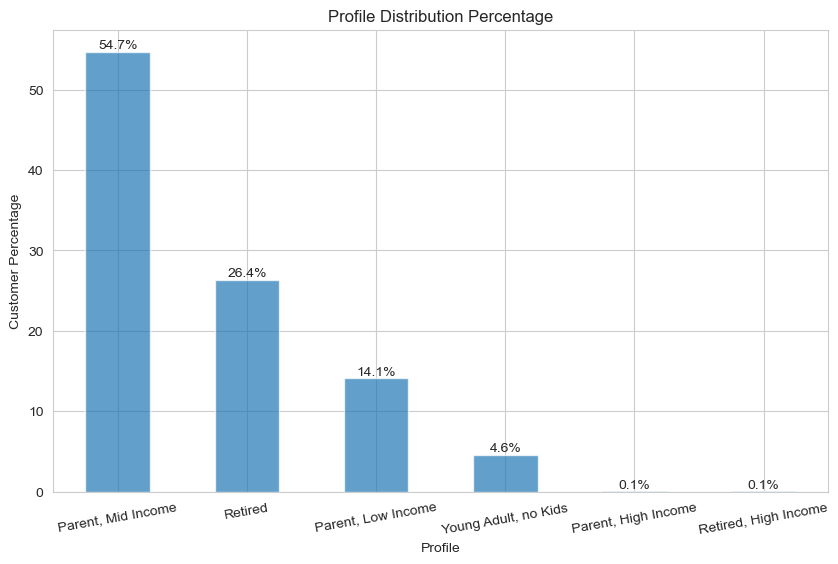

In [42]:
profileDist = PDi.plot.bar(rot=10, alpha=0.7, figsize=(10,6))
plt.title('Profile Distribution Percentage')
plt.ylabel('Customer Percentage')
for container in profileDist.containers:
  profileDist.bar_label(container, fmt='%.1f%%', label_type='edge')

## <a id='toc3_10_'></a>[Department Sales Volume per Region](#toc0_)

In [43]:
PR = df_cleared.groupby(['department_id', 'Profile', 'Region']).agg({'order_id':'count'}).reset_index().nlargest(63, 'order_id')
PR = PR.merge(depart, on='department_id', indicator='PRmerge')
PR = PR.rename(columns={'department':'Department','order_id':'Total Orders (in Millions)'})
PR

,department_id,Profile,Region,Total Orders (in Millions),Department,PRmerge
0,4,"Parent, Mid Income",South,1573306,produce,both
1,4,"Parent, Mid Income",West,1201460,produce,both
2,4,"Parent, Mid Income",Mid West,1108831,produce,both
3,16,"Parent, Mid Income",South,889939,dairy eggs,both
4,4,"Parent, Mid Income",North East,815064,produce,both
...,...,...,...,...,...,...
58,15,"Parent, Mid Income",Mid West,123587,canned goods,both
59,19,"Parent, Low Income",South,122554,snacks,both
60,20,"Parent, Mid Income",Mid West,122146,deli,both
61,1,Retired,Mid West,121597,frozen,both


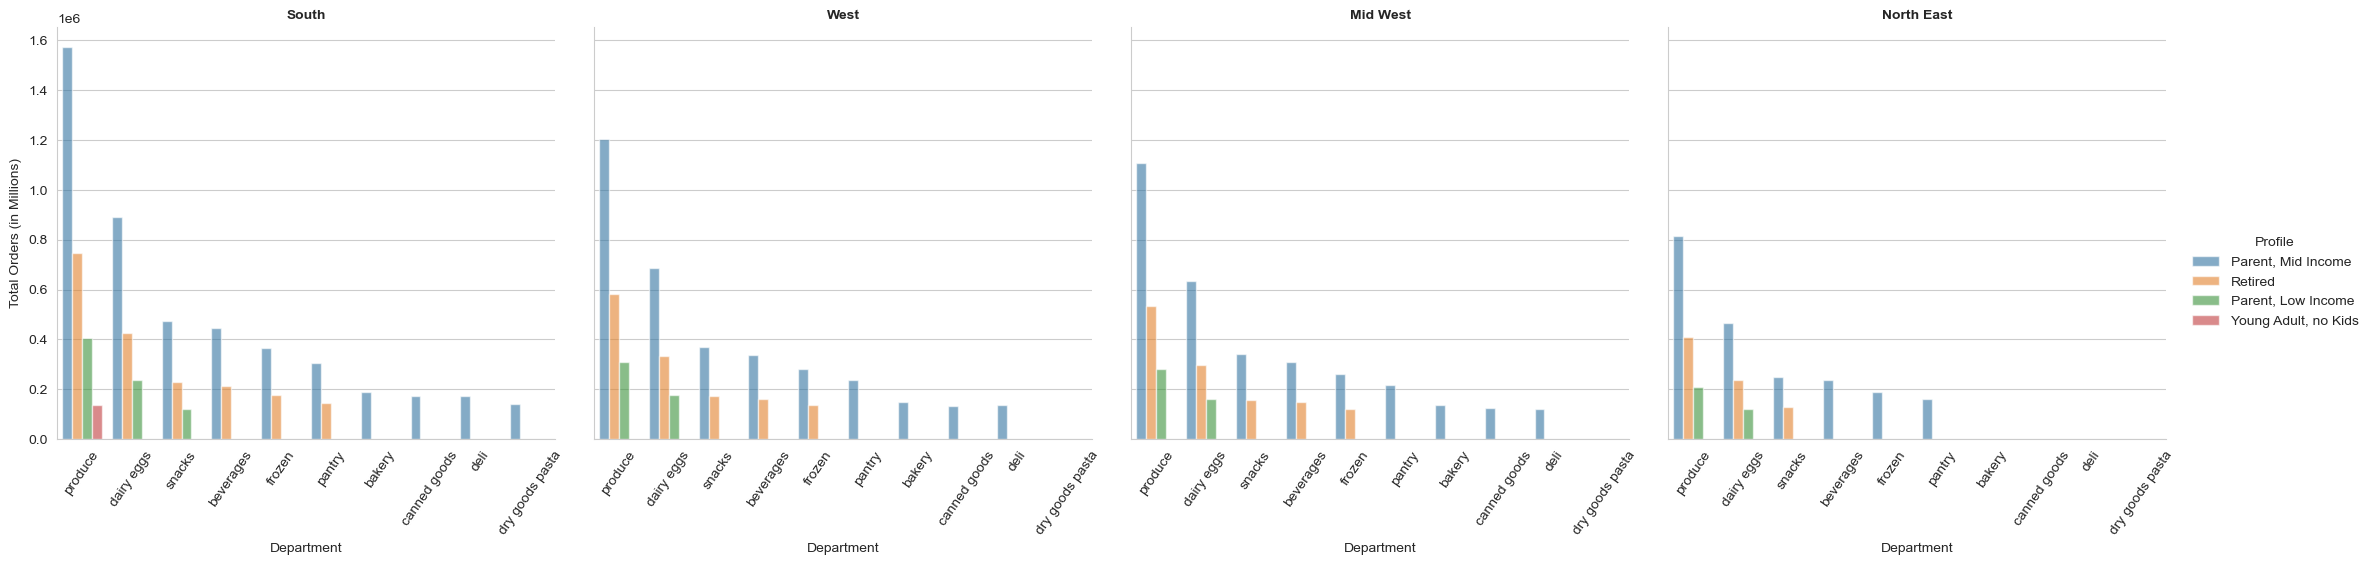

In [44]:
sns.set_style('whitegrid')
profileDept = sns.catplot(data=PR, x='Department', y='Total Orders (in Millions)', col='Region', kind='bar', hue='Profile', alpha=0.6, aspect=1.1)
profileDept.set_xticklabels(rotation=55)
profileDept.set_titles("{col_name}", fontsize=20, fontweight='bold')

## <a id='toc3_11_'></a>[Customer Loyalty Distribution by Region](#toc0_)

In [45]:
RLF = pd.crosstab(index=df_cleared['loyalty_flag'], columns=df_cleared['Region'], normalize='index')*100
RLF

Region,Mid West,North East,South,West
loyalty_flag,,,,
Loyal Customer,23.046741,18.066040,33.021214,25.866005
New Customer,23.630275,17.585847,33.158030,25.625848
Regular Customer,23.628263,17.478574,33.521174,25.371989


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Loyal Customer'),
  Text(0, 1.5, 'New Customer'),
  Text(0, 2.5, 'Regular Customer')])

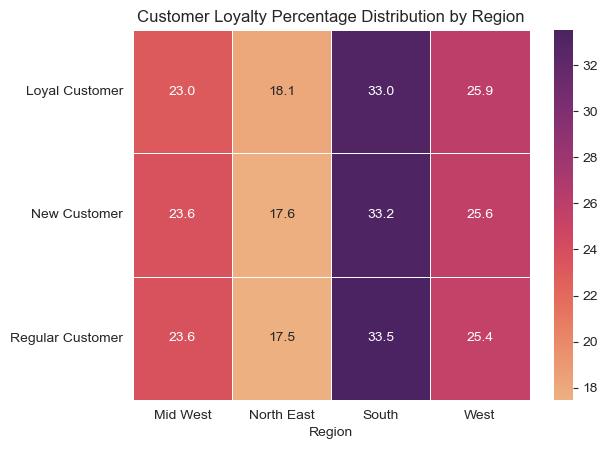

In [46]:
RegionLF = sns.heatmap(RLF, annot=True, fmt='.1f', linewidths=0.5, cmap='flare')
plt.title('Customer Loyalty Percentage Distribution by Region')
plt.ylabel('')
plt.yticks(rotation=0)

## <a id='toc3_12_'></a>[Customers Order Days by Profile](#toc0_)

([<matplotlib.axis.XTick at 0x19951030cd0>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tue'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thu'),
  Text(6, 0, 'Fri')])

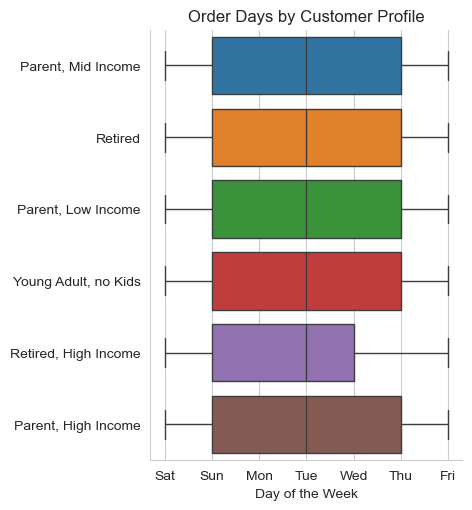

In [47]:
#Days of the week by customer profile line chart
orderDaysBox = sns.catplot(data=df_cleared, y='Profile', x='order_day_of_week', hue='Profile', kind='box')
plt.title('Order Days by Customer Profile')
plt.ylabel('')
plt.xlabel('Day of the Week')
plt.xticks([0,1,2,3,4,5,6], ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

## <a id='toc3_13_'></a>[Orders by Age per Family Status](#toc0_)

In [48]:
FS = df_cleared.groupby(['Age', 'fam_status'], observed=True).apply(lambda x: x['order_id'].nunique()//x['order_number'].nunique(), include_groups=False).reset_index()
FS.columns = ['Age', 'Family Status', 'Average Orders']
FS

,Age,Family Status,Average Orders
0,18,living with parents and siblings,336
1,18,single,108
2,19,living with parents and siblings,362
3,19,single,106
4,20,living with parents and siblings,342
...,...,...,...
123,79,married,357
124,80,divorced/widowed,117
125,80,married,350
126,81,divorced/widowed,126


Text(0, 0.5, 'Average Orders')

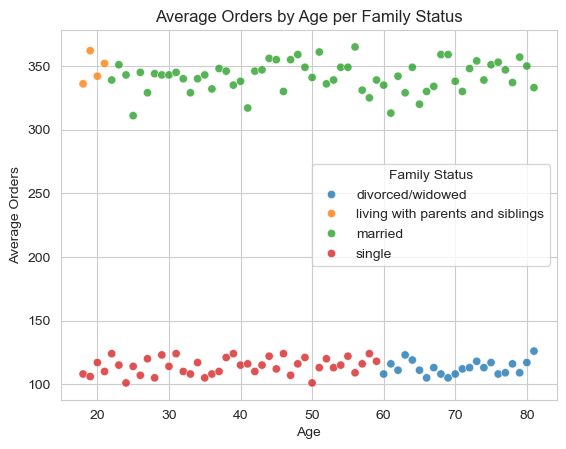

In [49]:
FamScatter = sns.scatterplot(data=FS, x='Age', y='Average Orders', hue='Family Status', alpha=0.8)
plt.title('Average Orders by Age per Family Status')
plt.ylabel('Average Orders')

# <a id='toc4_'></a>[Exporting Low Activity Dataframe and Visualizations](#toc0_)

In [51]:
lowActivity.to_csv(os.path.join(Path, 'Data', 'Prepared Data', 'low_activity_cust.csv'))

In [52]:
df_cleared.to_pickle(os.path.join(Path, 'Data', 'Prepared Data', 'ord_pro_cust_active.pkl'))

In [ ]:
topProducts.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'topProducts.png'))
departRange.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'departRange.png'))
PriceRangeHist.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'PriceRangeHist.png'))
RetFrequencyBox.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'RetFrequencyBox.png'))
loyalByDept.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'loyalByDept.png'))
bar_loyalty.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'bar_loyalty.png'))
loyalByPrice.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'loyalByPrice.png'))
RegionProf.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'RegionProf.png'))
profileSpender.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'profileSpender.png'))
profileDist.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'profileDist.png'))
profileDept.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'profileDept.png'))
RegionLF.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'RegionLF.png'))
orderDaysBox.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'orderDaysBox.png'))
FamScatter.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'FamScatter.png'))